In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/reviews.csv')

# Preprocessing
# Assuming 'content' column contains the review text and 'score' column contains the sentiment score
texts = df['content'].values
labels = df['score'].values

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/5
313/313 [==============================] - 53s 156ms/step - loss: -39.2048 - accuracy: 0.1999 - val_loss: -63.9490 - val_accuracy: 0.2009
Epoch 2/5
313/313 [==============================] - 50s 159ms/step - loss: -85.5969 - accuracy: 0.2005 - val_loss: -107.1141 - val_accuracy: 0.2009
Epoch 3/5
313/313 [==============================] - 50s 161ms/step - loss: -128.8137 - accuracy: 0.2005 - val_loss: -149.7733 - val_accuracy: 0.2009
Epoch 4/5
313/313 [==============================] - 49s 157ms/step - loss: -171.3188 - accuracy: 0.2005 - val_loss: -191.9467 - val_accuracy: 0.2009
Epoch 5/5
79/79 [==============================] - 2s 19ms/step - loss: -233.8665 - accuracy: 0.2009
Accuracy: 20.09%


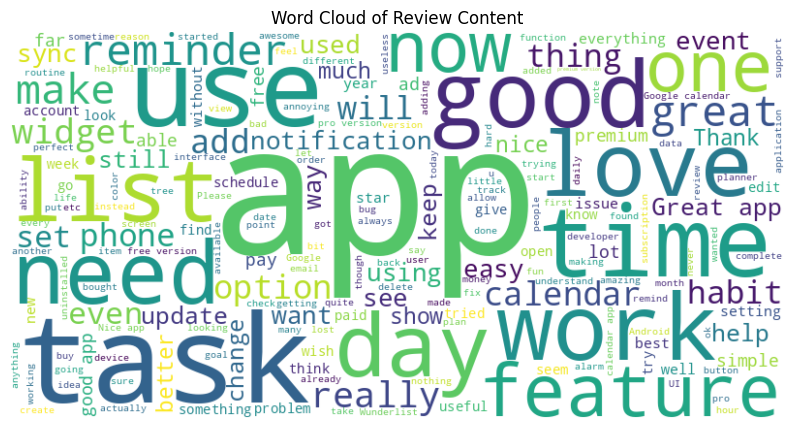

In [3]:
# Word cloud for review content
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df['content'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content')
plt.show()



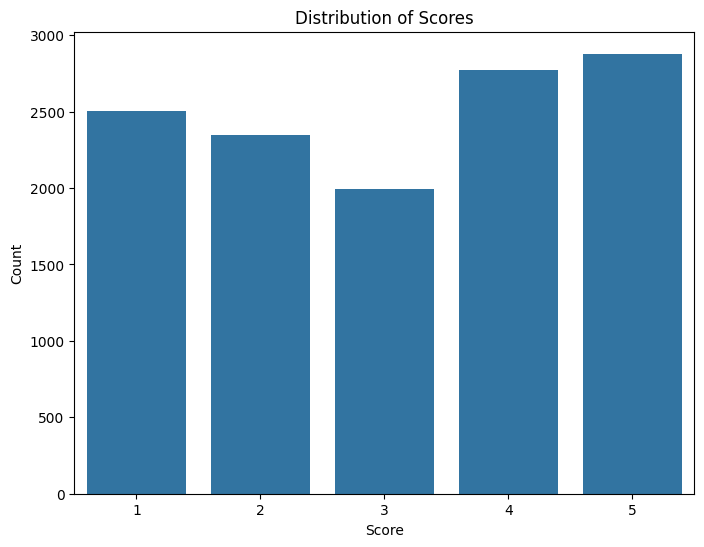

In [6]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

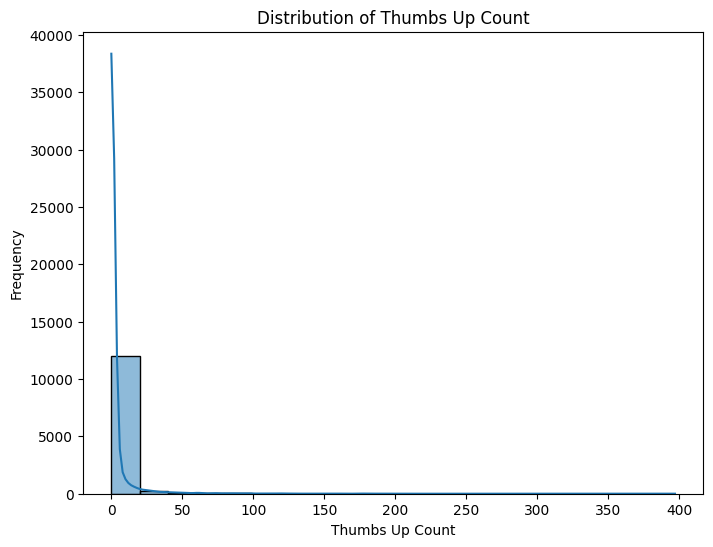

In [7]:
# Thumbs up count distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['thumbsUpCount'], bins=20, kde=True)
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()